In [353]:
%run ../utilities/heatmap.py

In [280]:
def get_results(results_dir):
    # reads in pydl and pyjtk results into dfs for one ts
    dir_contents = os.listdir(results_dir)
    node_dir = [item for item in dir_contents if item.startswith("node")][0]
    node_dir_contents = os.listdir(os.path.join(results_dir, node_dir))
    pydl_file = [item for item in node_dir_contents if item.startswith("pydl")][0]
    pyjtk_file = [item for item in node_dir_contents if item.startswith("pyjtk")][0]
    pydl_df = pd.read_csv(os.path.join(results_dir, node_dir, pydl_file), sep="\t", comment="#", index_col=0)
    pyjtk_df = pd.read_csv(os.path.join(results_dir, node_dir, pyjtk_file), sep="\t", comment="#", index_col=0)
    return pydl_df, pyjtk_df

def get_ts(filename):
    # reads ts into df
    ts_df = pd.read_csv(os.path.join("Data", filename), sep="\t", index_col=0)
    return(ts_df)

def pydl_filter_ts(ts_df, pydl_df, threshold, thres_rank=False):
    # filters pydl df on dl_score column, or if thres_rank == True, filter by top N genes
    pydl_sorted = pydl_df.sort_values(by="dl_score")
    if thres_rank:
        pydl_sorted_thres = pydl_sorted[:threshold]
    else:
        pydl_sorted_thres = pydl_sorted[pydl_sorted["dl_score"] <= threshold]
    ts_filtered_df = ts_df[ts_df.index.isin(pydl_sorted_thres.index)]
    return ts_filtered_df

def pyjtk_filter_ts(ts_df, pyjtk_df, threshold, thres_rank=False):
    # filters pyjtk df on p-value column, or if thres_rank == True, filter by top N genes
    pyjtk_sorted = pyjtk_df.sort_values(by="p-value")
    if thres_rank:
        pyjtk_sorted_thres = pyjtk_sorted[:threshold]
    else:  
        pyjtk_sorted_thres = pyjtk_sorted[pyjtk_sorted["p-value"] <= threshold]
    ts_filtered_df = ts_df[ts_df.index.isin(pyjtk_sorted_thres.index)]
    return ts_filtered_df

def plot_heatmap_max(ts_df, results_df, method, thres, thres_rank=False, axis=None):
    # plot heatmap of a ts that has been ordered by phase of max gene expression in first period.
    # ts has also been filtered by a given threshold used on a given method of ranking periodicity
#     f, axs = plt.subplots(figsize=(8,12))
    if method == "pydl":
        genelist = pydl_filter_ts(ts_df, results_df, thres, thres_rank).index.tolist()
    elif method == "pyjtk":
        genelist = pyjtk_filter_ts(ts_df, results_df, thres, thres_rank).index.tolist()
        
    heat = heatmap_max(ts_df, genelist, 16, axis=axis)

In [301]:
AA_3D7_pydl_df, AA_3D7_pyjtk_df = get_results("Results/AA_3D7_results")
AS_3D7_pydl_df, AS_3D7_pyjtk_df = get_results("Results/AS_3D7_results")
AA_FUP_pydl_df, AA_FUP_pyjtk_df = get_results("Results/AA_FUP_results")
AS_FUP_pydl_df, AS_FUP_pyjtk_df = get_results("Results/AS_FUP_results")

In [302]:
AA_3D7_ts_df = get_ts("AA_3D7_means_filtered.tsv")
AS_3D7_ts_df = get_ts("AS_3D7_means_filtered.tsv")
AA_FUP_ts_df = get_ts("AA_FUP_means_filtered.tsv")
AS_FUP_ts_df = get_ts("AS_FUP_means_filtered.tsv")

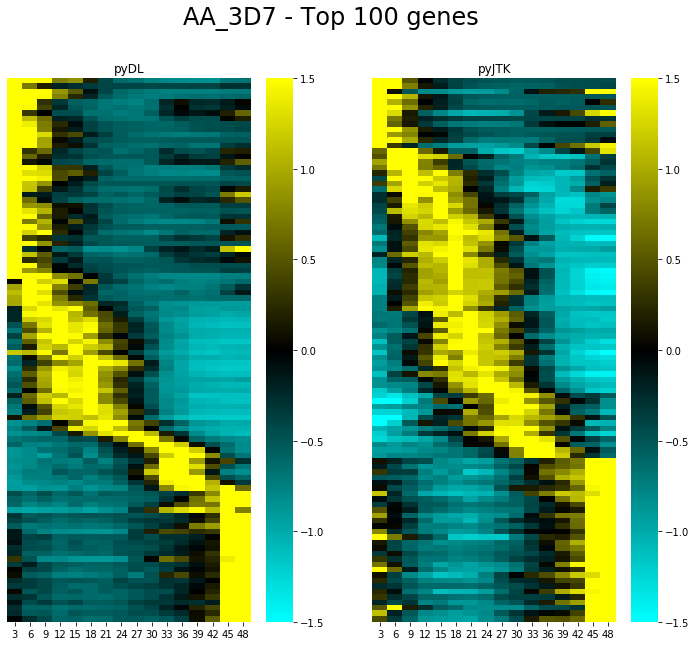

In [319]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 100
fig.suptitle('AA_3D7 - Top {} genes'.format(top_N), fontsize=24)
plot_heatmap_max(AA_3D7_ts_df, AA_3D7_pydl_df, "pydl", top_N, thres_rank=True, axis = ax1)
ax1.title.set_text('pyDL')
plot_heatmap_max(AA_3D7_ts_df, AA_3D7_pyjtk_df, "pyjtk", top_N, thres_rank=True, axis = ax2)
ax2.title.set_text('pyJTK')

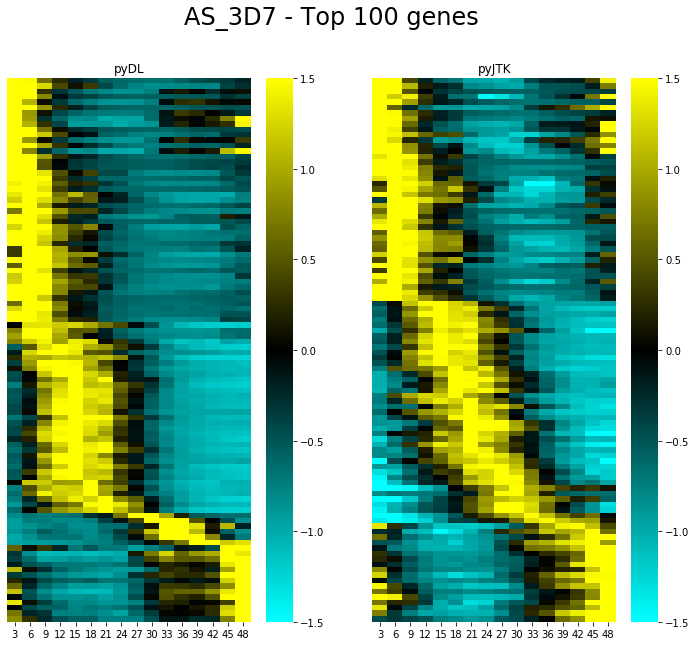

In [318]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 100
fig.suptitle('AS_3D7 - Top {} genes'.format(top_N), fontsize=24)
plot_heatmap_max(AS_3D7_ts_df, AS_3D7_pydl_df, "pydl", top_N, thres_rank=True, axis = ax1)
ax1.title.set_text('pyDL')
plot_heatmap_max(AS_3D7_ts_df, AS_3D7_pyjtk_df, "pyjtk", top_N, thres_rank=True, axis = ax2)
ax2.title.set_text('pyJTK')

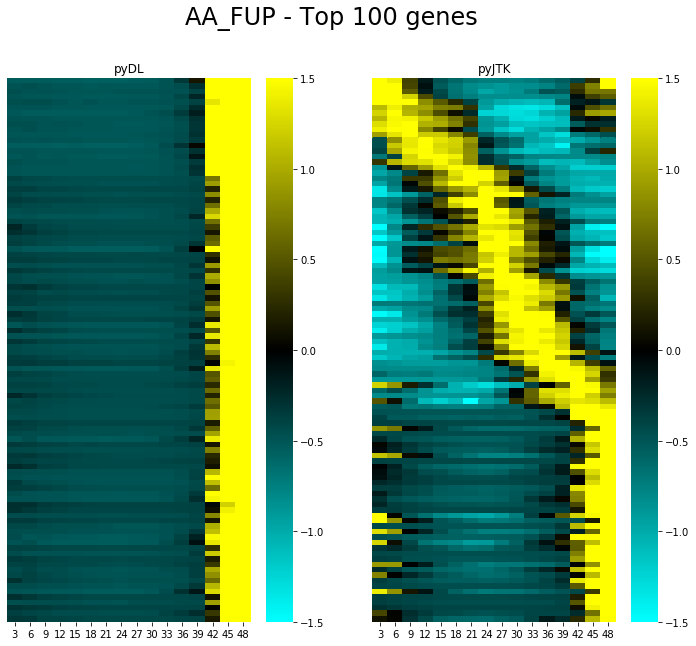

In [317]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 100
fig.suptitle('AA_FUP - Top {} genes'.format(top_N), fontsize=24)
plot_heatmap_max(AA_FUP_ts_df, AA_FUP_pydl_df, "pydl", top_N, thres_rank=True, axis = ax1)
ax1.title.set_text('pyDL')
plot_heatmap_max(AA_FUP_ts_df, AA_FUP_pyjtk_df, "pyjtk", top_N, thres_rank=True, axis = ax2)
ax2.title.set_text('pyJTK')

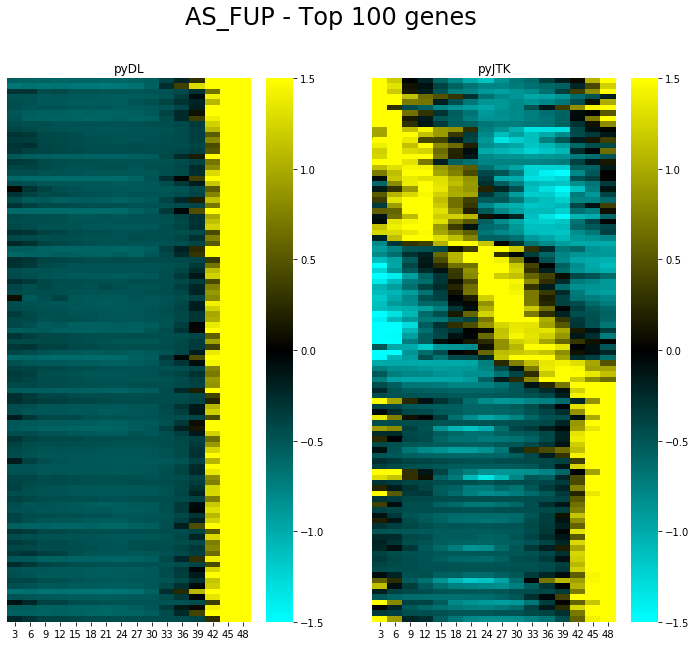

In [316]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 100
fig.suptitle('AS_FUP - Top {} genes'.format(top_N), fontsize=24)
plot_heatmap_max(AS_FUP_ts_df, AS_FUP_pydl_df, "pydl", top_N, thres_rank=True, axis = ax1)
ax1.title.set_text('pyDL')
plot_heatmap_max(AS_FUP_ts_df, AS_FUP_pyjtk_df, "pyjtk", top_N, thres_rank=True, axis = ax2)
ax2.title.set_text('pyJTK')

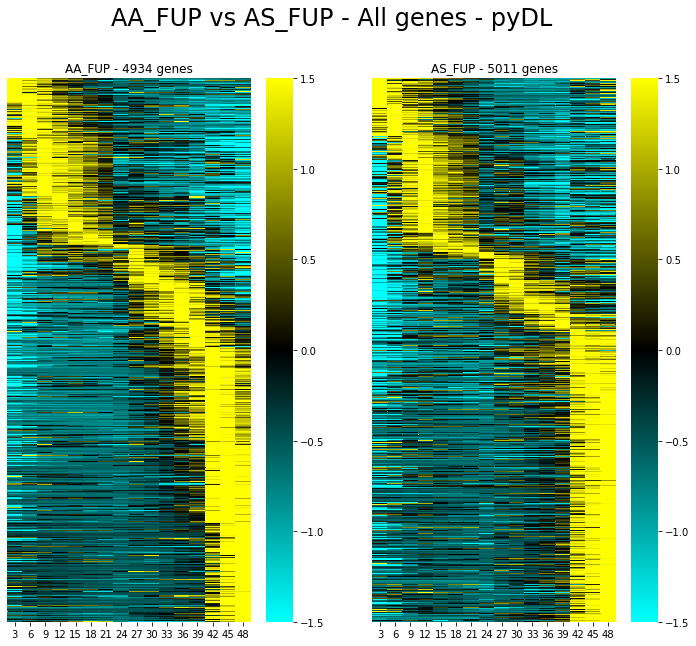

In [320]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
fig.suptitle('AA_FUP vs AS_FUP - All genes - pyDL', fontsize=24)
plot_heatmap_max(AA_FUP_ts_df, AA_FUP_pydl_df, "pydl", AA_FUP_ts_df.shape[0], thres_rank=True, axis = ax1)
ax1.title.set_text('AA_FUP - {} genes'.format(AA_FUP_ts_df.shape[0]))
plot_heatmap_max(AS_FUP_ts_df, AS_FUP_pydl_df, "pydl", AS_FUP_ts_df.shape[0], thres_rank=True, axis = ax2)
ax2.title.set_text('AS_FUP - {} genes'.format(AS_FUP_ts_df.shape[0]))

### AA 3D7 top rhythmic genes and their AS 3D7 orthologs 
#### Paired heatmaps share the same gene order along the y-axis

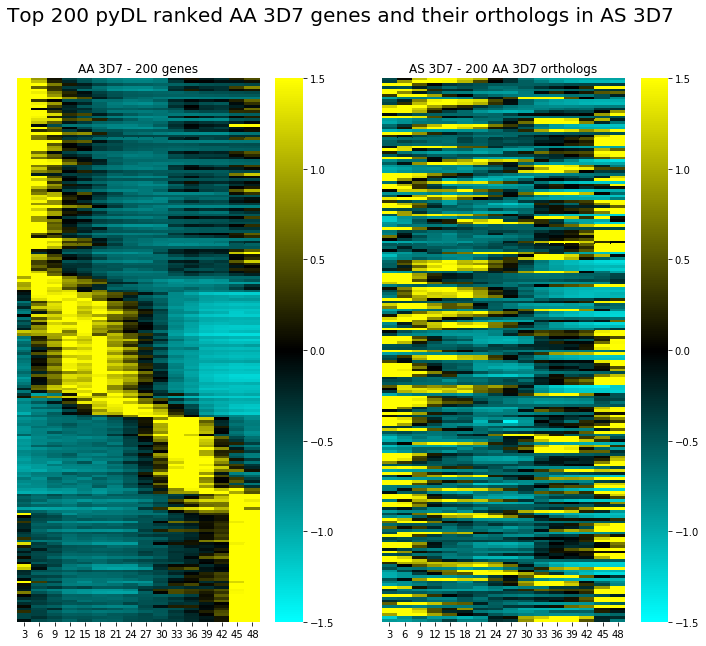

In [351]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 200
fig.suptitle('Top {} pyDL ranked AA 3D7 genes and their orthologs in AS 3D7'.format(top_N), fontsize=20)
AA_3D7_genelist = pydl_filter_ts(AA_3D7_ts_df, AA_3D7_pydl_df, top_N, thres_rank=True).index.tolist()
aa3d7_heat = heatmap_max(AA_3D7_ts_df, AA_3D7_genelist, 16, axis=ax1)
ax1.title.set_text('AA 3D7 - {} genes'.format(top_N))
as3d7_heat = heatmap_order(AS_3D7_ts_df, AA_3D7_genelist, axis=ax2)
ax2.title.set_text('AS 3D7 - {} AA 3D7 orthologs'.format(top_N))

/Users/robertmoseley/Desktop/Malaria-Sickle/Sickle-trait-RNAseq/python_functions/heatmap.py:51: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  data = data.loc[order]


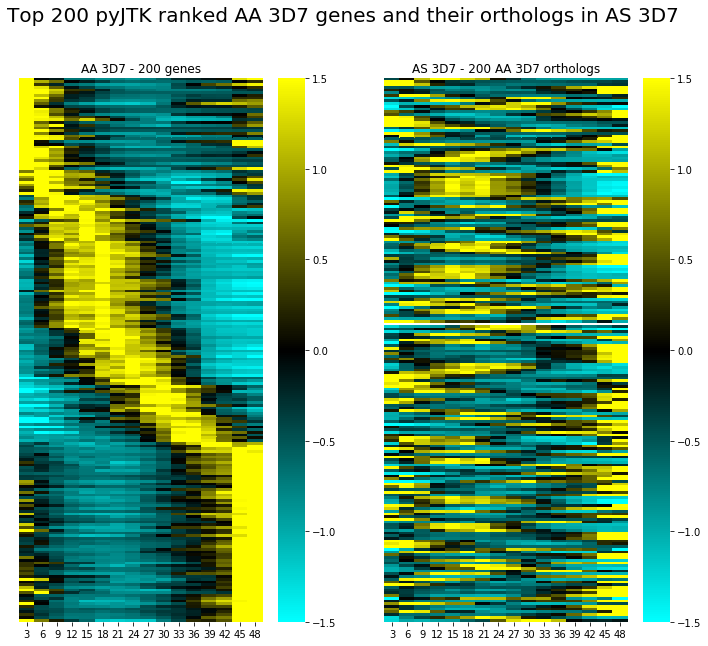

In [352]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
top_N = 200
fig.suptitle('Top {} pyJTK ranked AA 3D7 genes and their orthologs in AS 3D7'.format(top_N), fontsize=20)
AA_3D7_genelist = pyjtk_filter_ts(AA_3D7_ts_df, AA_3D7_pyjtk_df, top_N, thres_rank=True).index.tolist()
aa3d7_heat = heatmap_max(AA_3D7_ts_df, AA_3D7_genelist, 16, axis=ax1)
ax1.title.set_text('AA 3D7 - {} genes'.format(top_N))
as3d7_heat = heatmap_order(AS_3D7_ts_df, AA_3D7_genelist, axis=ax2)
ax2.title.set_text('AS 3D7 - {} AA 3D7 orthologs'.format(top_N))